## Purpose 
 
This test case aims to validate the ALE (Arbitrary Lagrangian–Eulerian) implementation in TrioCFD against the SPHERIC benchmark [1], which represents a 2D incompressible flow around a translating square cylinder in a rectangular tank.
The geometry and motion setup are adapted from the benchmark. The Reynolds number is fixed at Re = 50. The test examines the hydrodynamic response of the fluid when the square begins at rest and linearly accelerates to a constant horizontal velocity within one second.
 This scenario is representative of fluid–structure interaction cases and provides a basis for comparing results between particle-based methods (SPH) and mesh-based ALE formulations.
 
 Validation made by : M. A. Puscas 
 
 Report generated  06/06/2025


In [ ]:
from trustutils import run
 
run.reset() 
run.addCase(".","TranslatingSquare_ALE_CoarseMesh.data")
run.runCases()

## Problem Description 
 
The computational domain used in the simulation matches the SPHERIC benchmark configuration and is shown in Figure 1.



### Geometry 


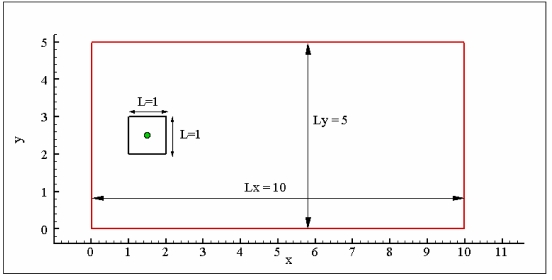

In [4]:
from IPython.display import Image, display


display(Image(filename='src/geometry.png'))

### Initial Conditions and Boundary Conditions 


The square is initially at rest and accelerates horizontally, reaching its maximum velocity after 1 second. The imposed motion is visualized below.


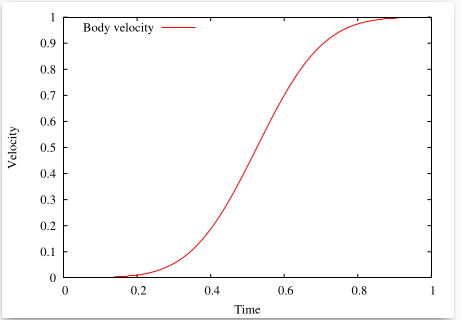

In [1]:
from IPython.display import Image, display


display(Image(filename='src/velocity.png'))

The tank boundaries (left, right, top, and bottom) are fixed and impermeable. The fluid is initially at rest throughout the domain.


## Results 
### Validation Specific Informations 
* Version TRUST :  
* Problem : Pb\_hydraulique\_ALE
* Dimension : 2D
* Domain : Domaine\_ALE
* Discretization : VEFPre1B
* Time scheme : Scheme\_euler\_implicit with solver implicite\_ALE
* Medium : Fluide\_Incompressible
* Hydraulic problem : Navier\_Stokes\_standard\_ALE
* Convection scheme: ALE amont
* Generated Test cases : 
	- ./TranslatingSquare\_ALE\_CoarseMesh.data : /* jdd provided in annex */  


### Performance Chart
 
 

In [ ]:
run.tablePerf()

### Plot Data 
 


The primary quantity of interest is the pressure component of the drag coefficient acting on the square, which reflects the interaction between the fluid and the moving body.

The drag coefficient pressure component $C_{D,p}$ (pressure component) is given by:



$\displaystyle{C_d = \frac{\int_{\text{interface}} (-p \cdot \vec{n}_x) \, dS}{\frac{1}{2} \cdot \rho  \cdot S \cdot U_{\text{max}}^2}}$

where $U_{\text{max} = 1 \, \text{m/s}}$ (the maximum velocity of the obstacle). 


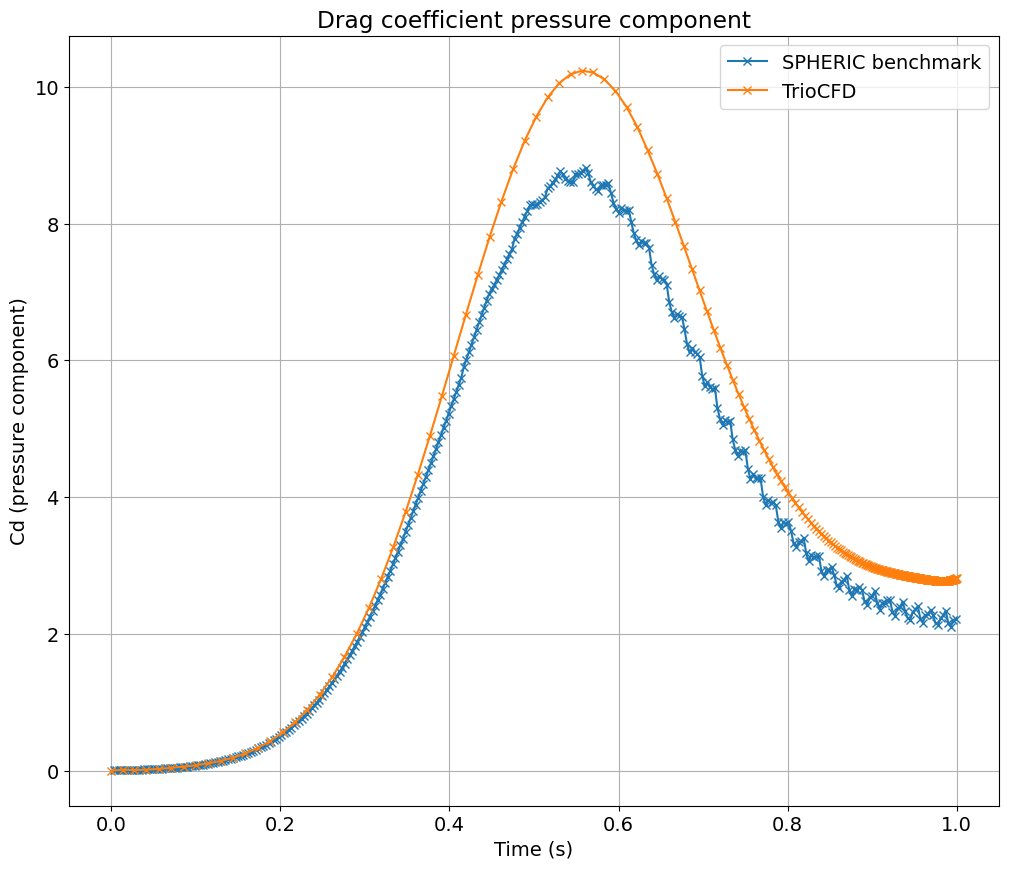

In [1]:
from trustutils import plot 
 
fig = plot.Graph(r"Drag coefficient pressure component") 
data = plot.loadText("ReferenceSolution.dat")
fig.add(data[0],data[1],label=r"SPHERIC benchmark",marker='-x')
data = plot.loadText("TranslatingSquare_ALE_CoarseMesh_SONDE_DRAG_COEF_PRESSURE_COMP.son")
fig.add(data[0],data[1],label=r"TrioCFD",marker='-x')

fig.label(r"Time (s)",r"Cd (pressure component)")


The drag coefficient viscous component $\displaystyle{C_{D,\nu}}$ (viscous component) is given by:


$\displaystyle{C_{D,\nu} = \frac{\int_{\text{interface}} \left( \boldsymbol{\tau} \cdot \vec{n} \right)_x \, dS}{\frac{1}{2} \cdot \rho \cdot S \cdot U_{\text{max}}^2} }$


where $\displaystyle{\boldsymbol{\tau}}$ is the viscous stress tensor and $\displaystyle{\left( \boldsymbol{\tau} \cdot \vec{n} \right)_x}$ is its projection in the flow direction (x). As before, $\displaystyle{U_{\text{max}} = 1 \, \text{m/s}}$ is the reference velocity. 

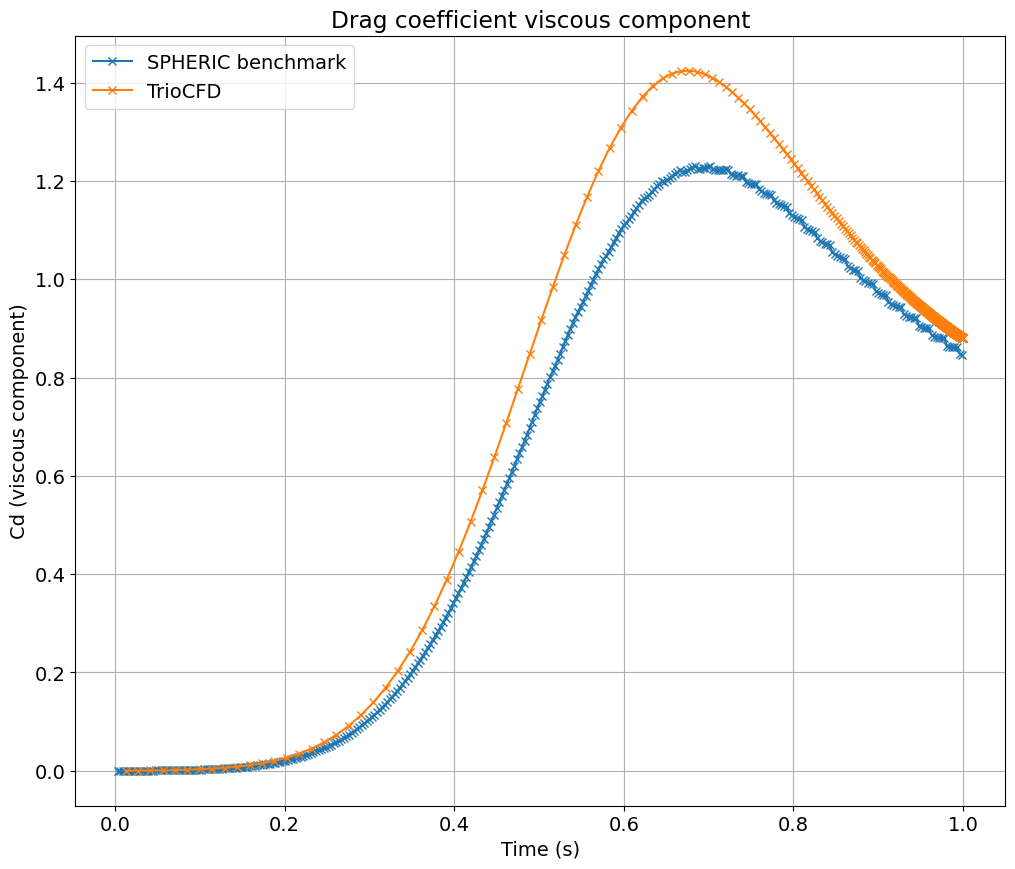

In [4]:
from trustutils import plot 
import numpy as np


vitesse=1
surface=1
rho=1
param = 1/(0.5*(vitesse**2)*surface*rho)


fig = plot.Graph(r"Drag coefficient viscous component") 
data = plot.loadText("ReferenceSolution.dat")
fig.add(data[0],data[2],label=r"SPHERIC benchmark",marker='-x')

data_ale =plot.loadText('TranslatingSquare_ALE_CoarseMesh_pb_Contrainte_visqueuse.out')
x_ale = data_ale[0]
y_ale = data_ale[5]+data_ale[7]
y_ale =param *abs(y_ale)
fig.add(x_ale,y_ale,label=r"TrioCFD",marker='-x')

fig.label(r"Time (s)",r"Cd (viscous component)")

Flow field visualizations provide insight into pressure and velocity distribution, as well as the mesh deformation due to the ALE approach. 


### Pressure field (SOM)
 
 

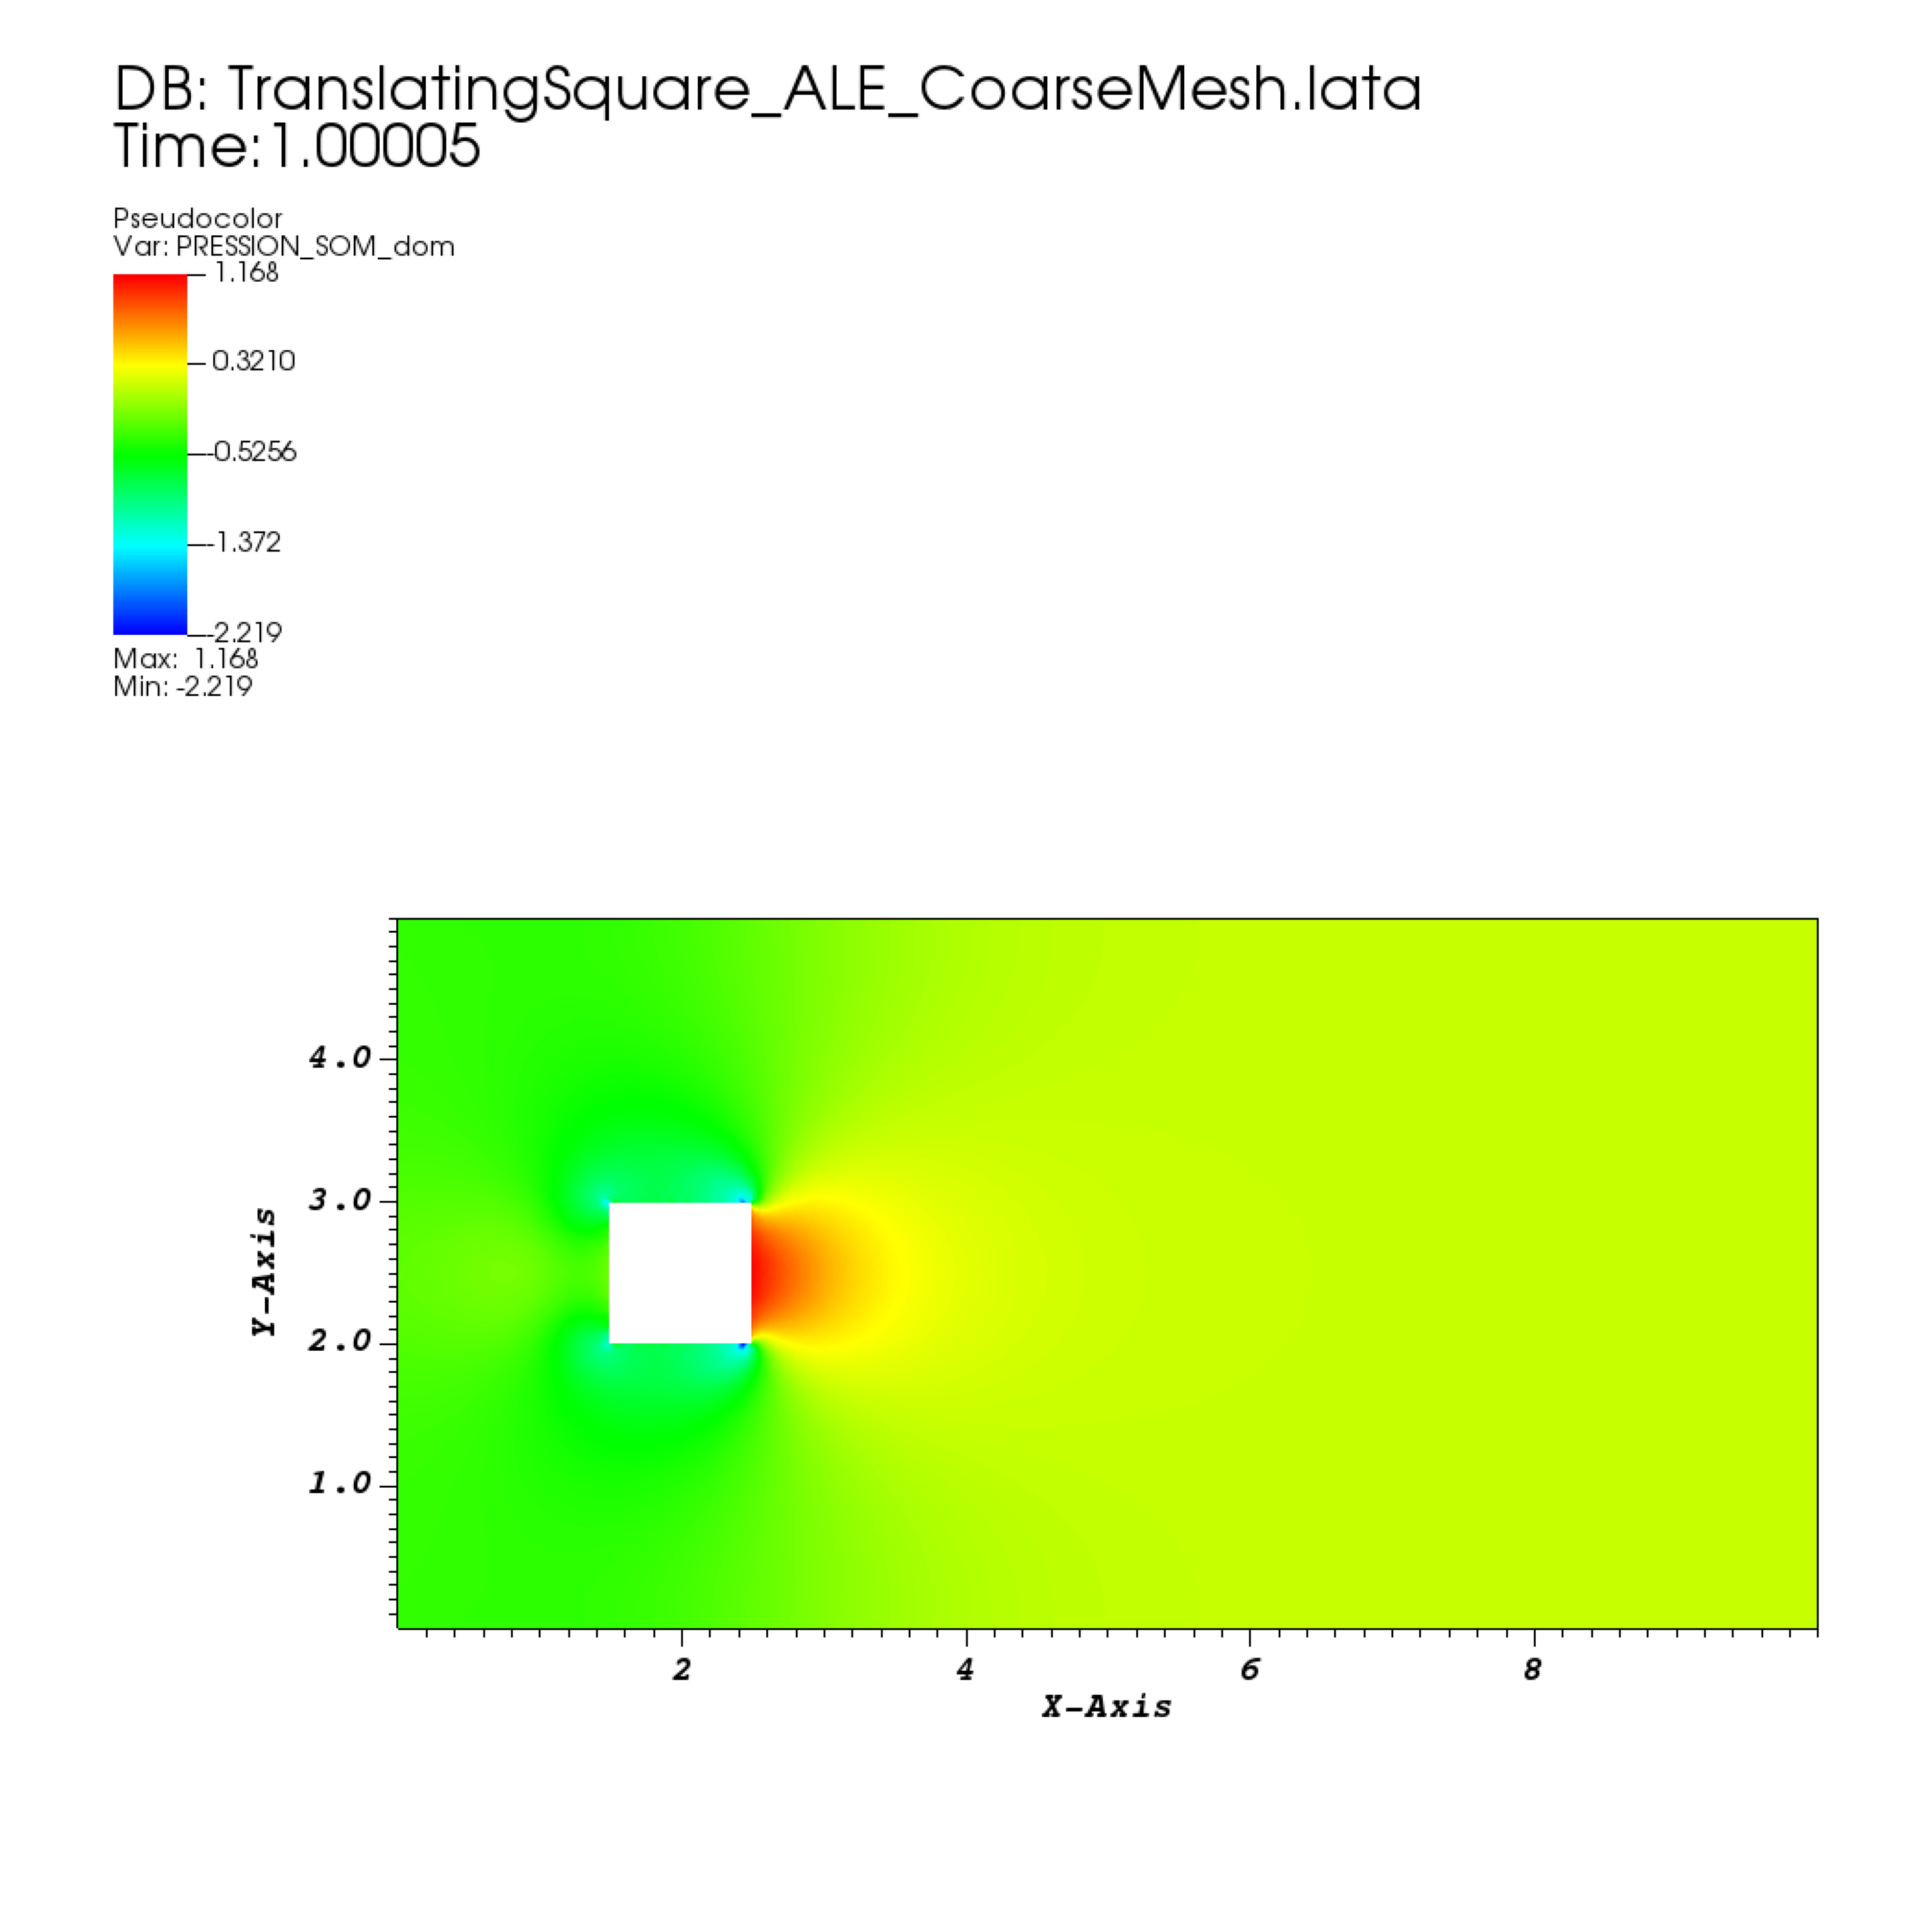

In [3]:
from trustutils import visit
 
visu = visit.Show("TranslatingSquare_ALE_CoarseMesh.lata","Pseudocolor","PRESSION_SOM_dom",plotmesh=False)
visu.plot()

### X-component of velocity (ELEM)
 
 

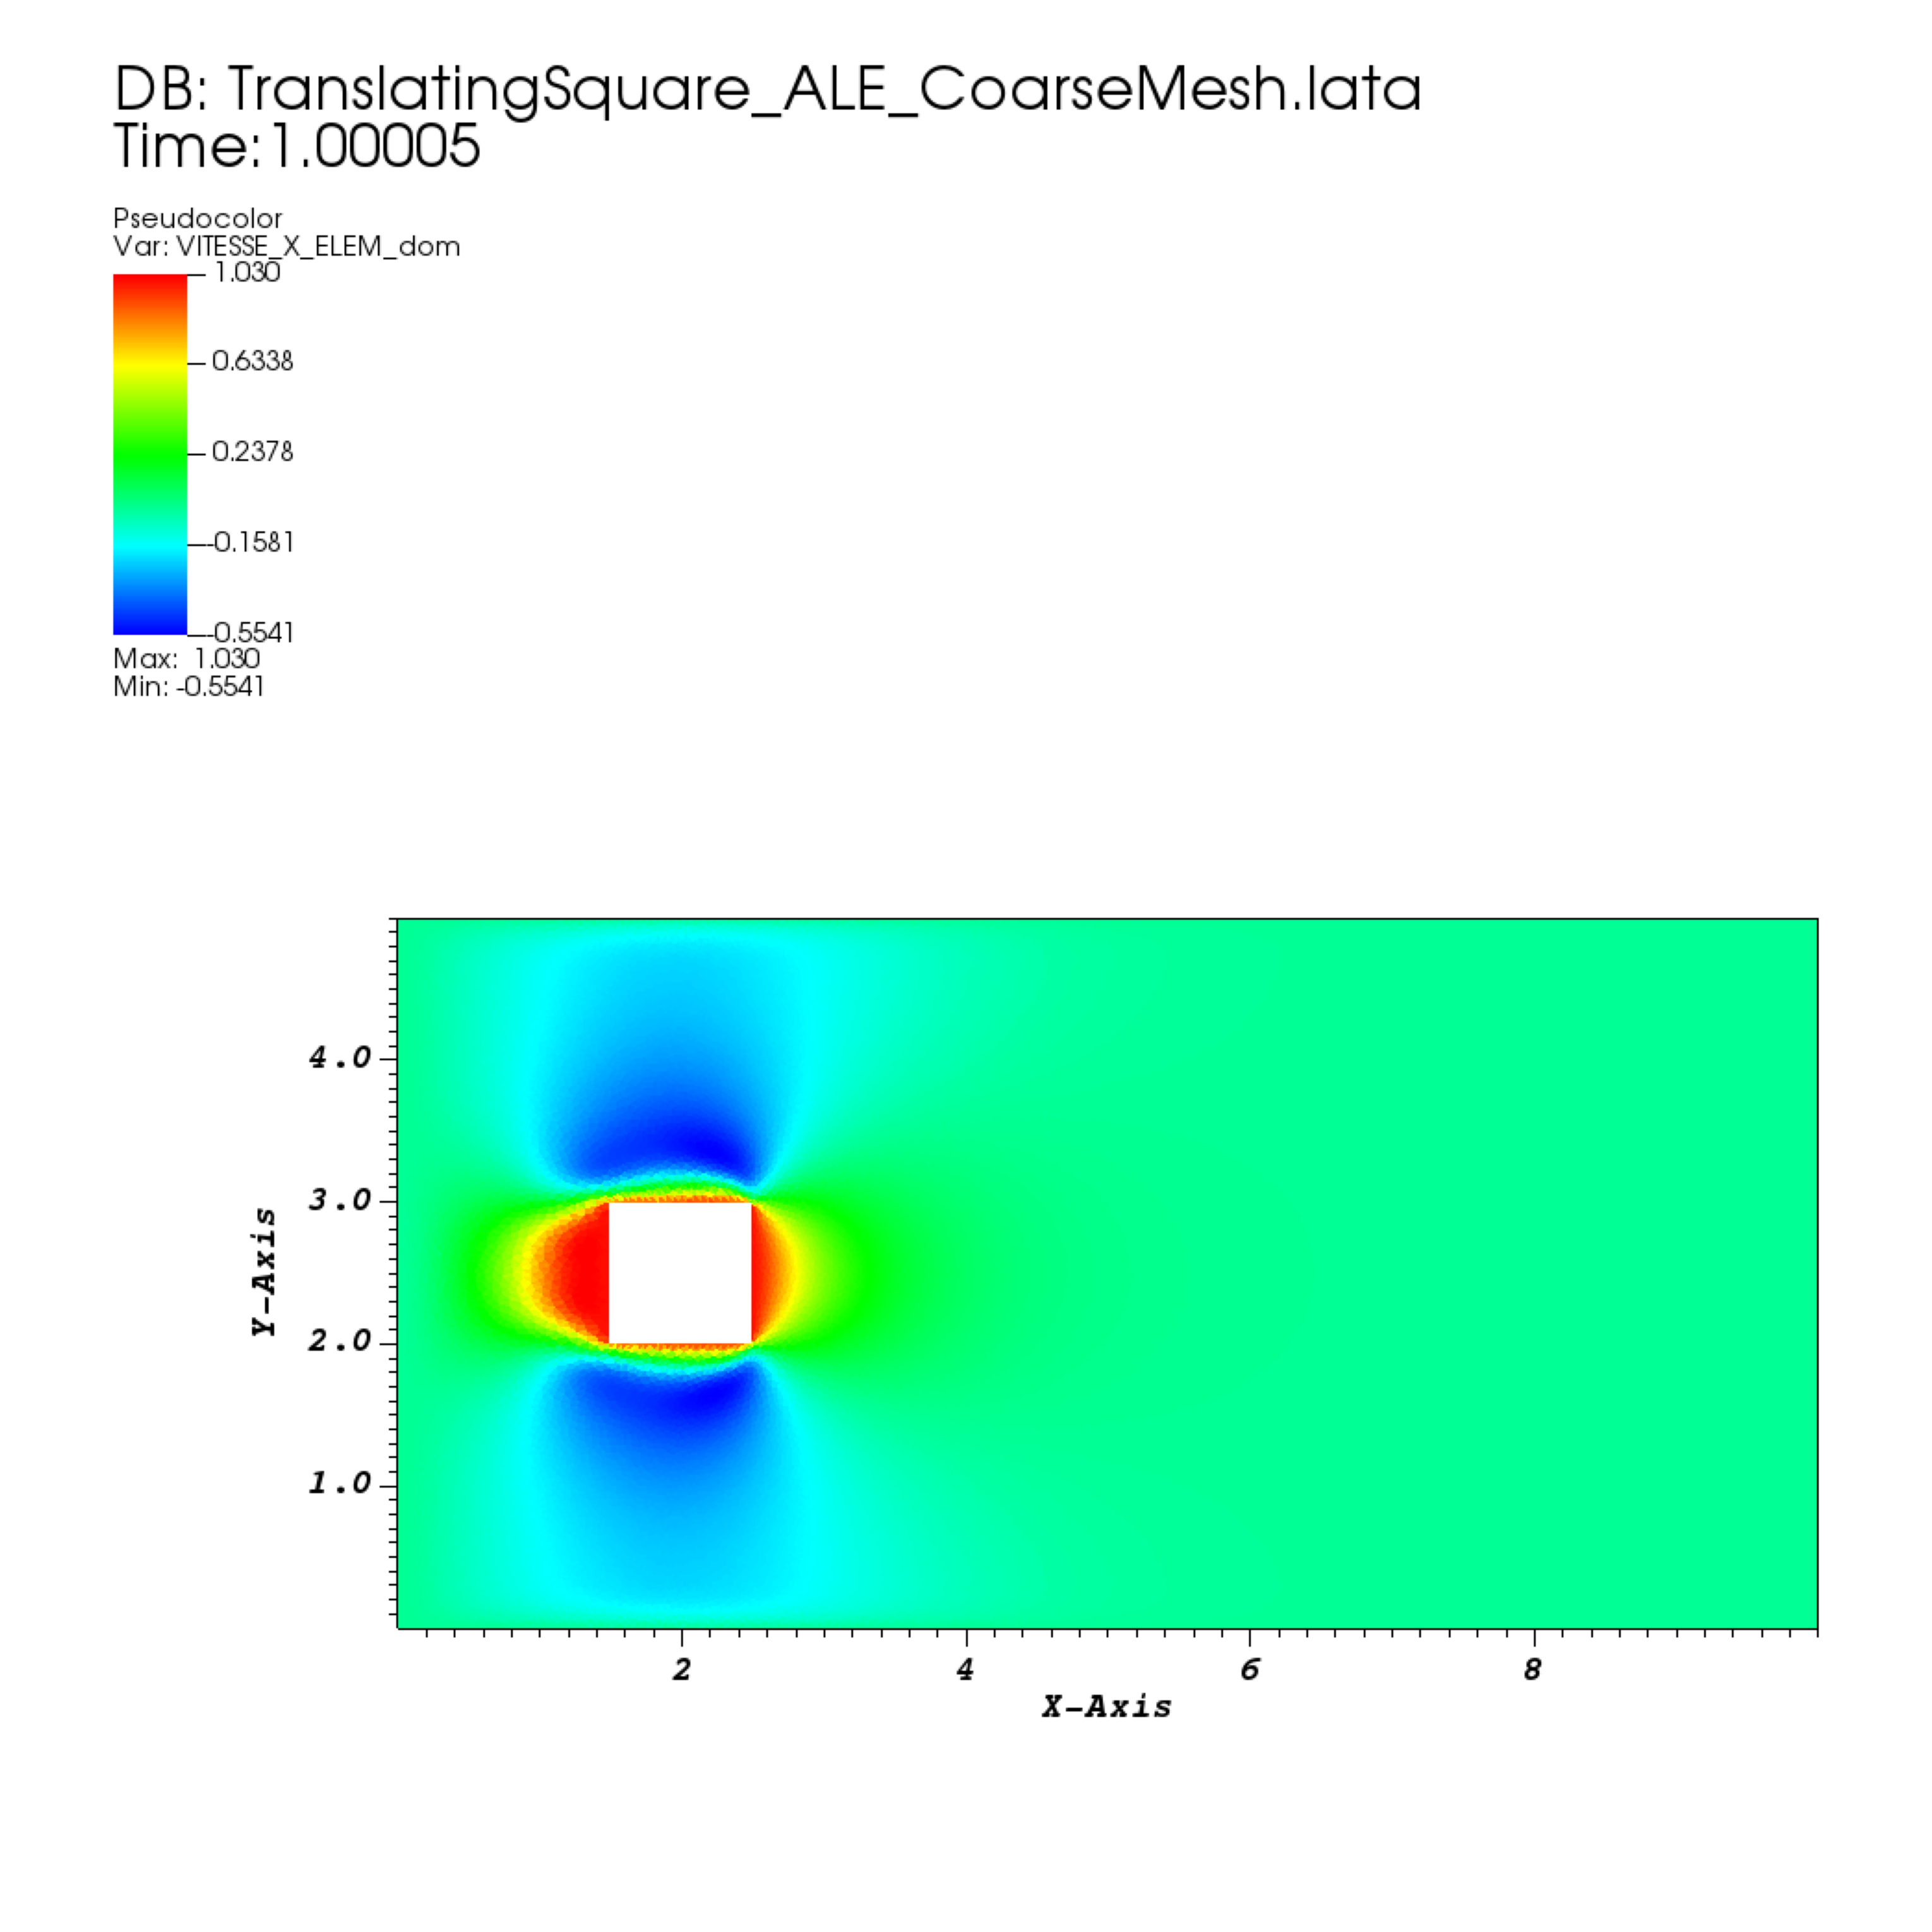

In [4]:
from trustutils import visit
 
visu = visit.Show("TranslatingSquare_ALE_CoarseMesh.lata","Pseudocolor","VITESSE_X_ELEM_dom",plotmesh=False)
visu.plot()

### Y-component of velocity (ELEM)
 
 

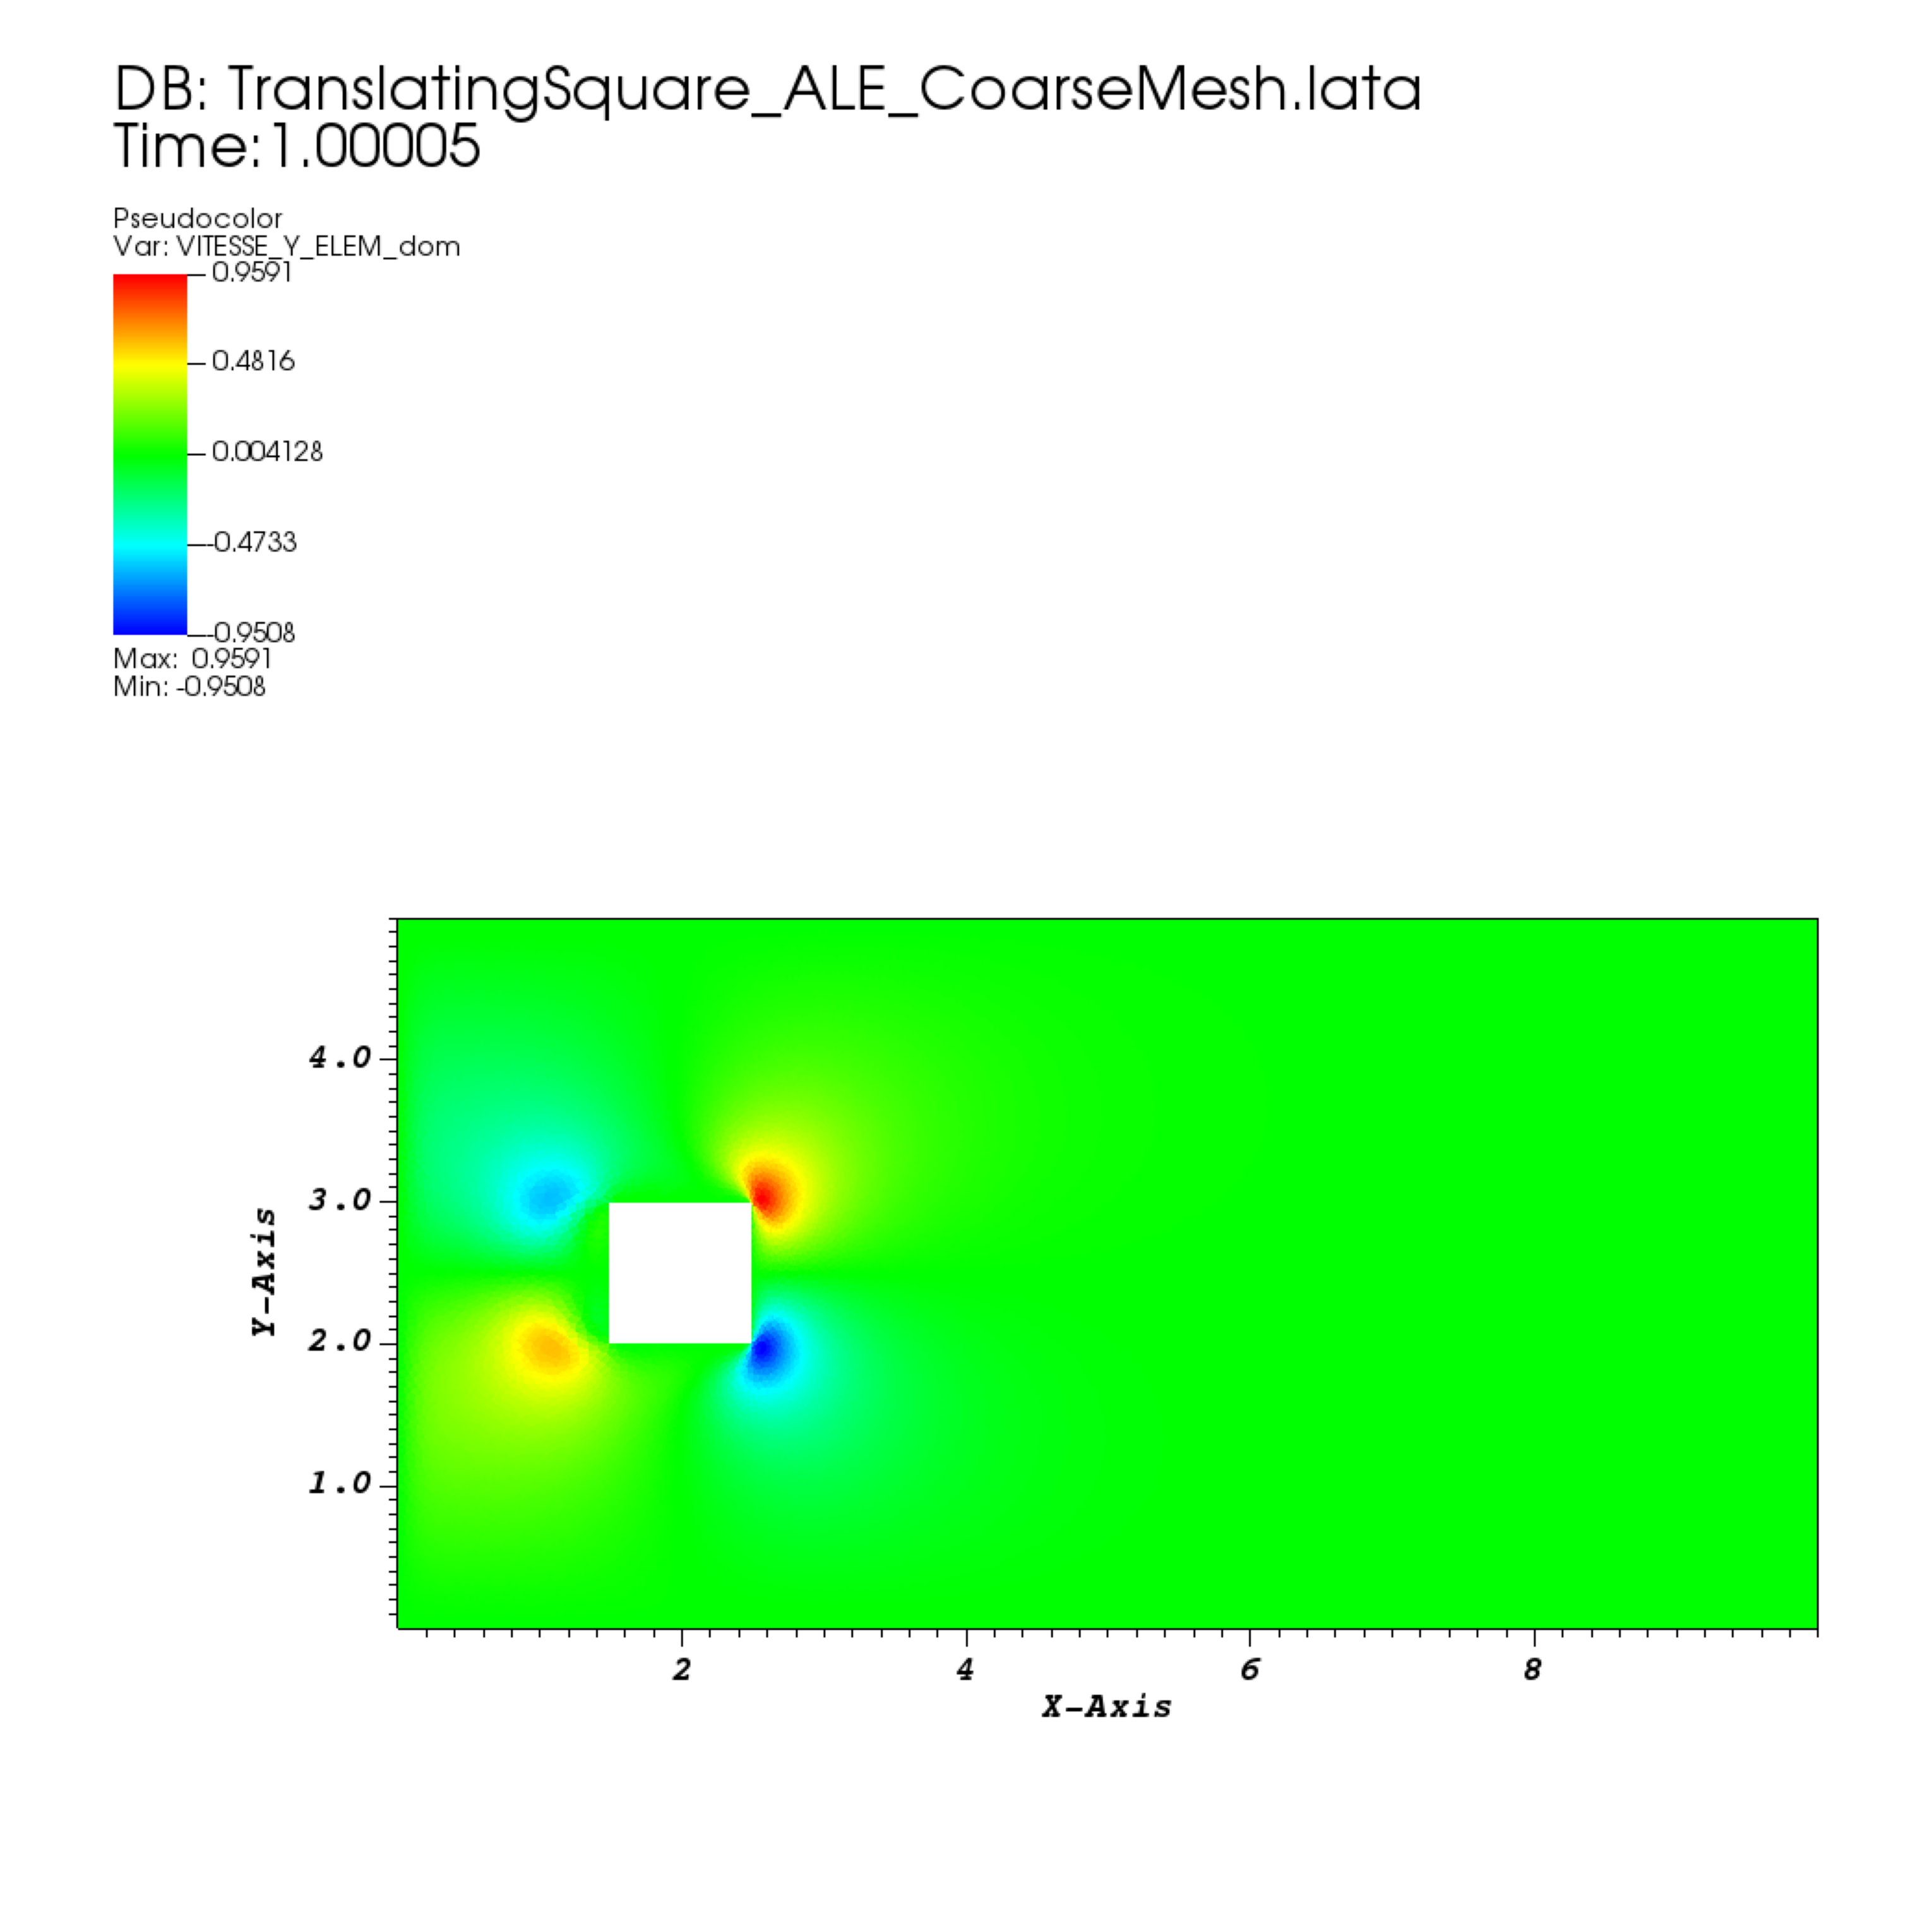

In [5]:
from trustutils import visit
 
visu = visit.Show("TranslatingSquare_ALE_CoarseMesh.lata","Pseudocolor","VITESSE_Y_ELEM_dom",plotmesh=False)
visu.plot()

### Mesh velocity norm (SOM)
 
 

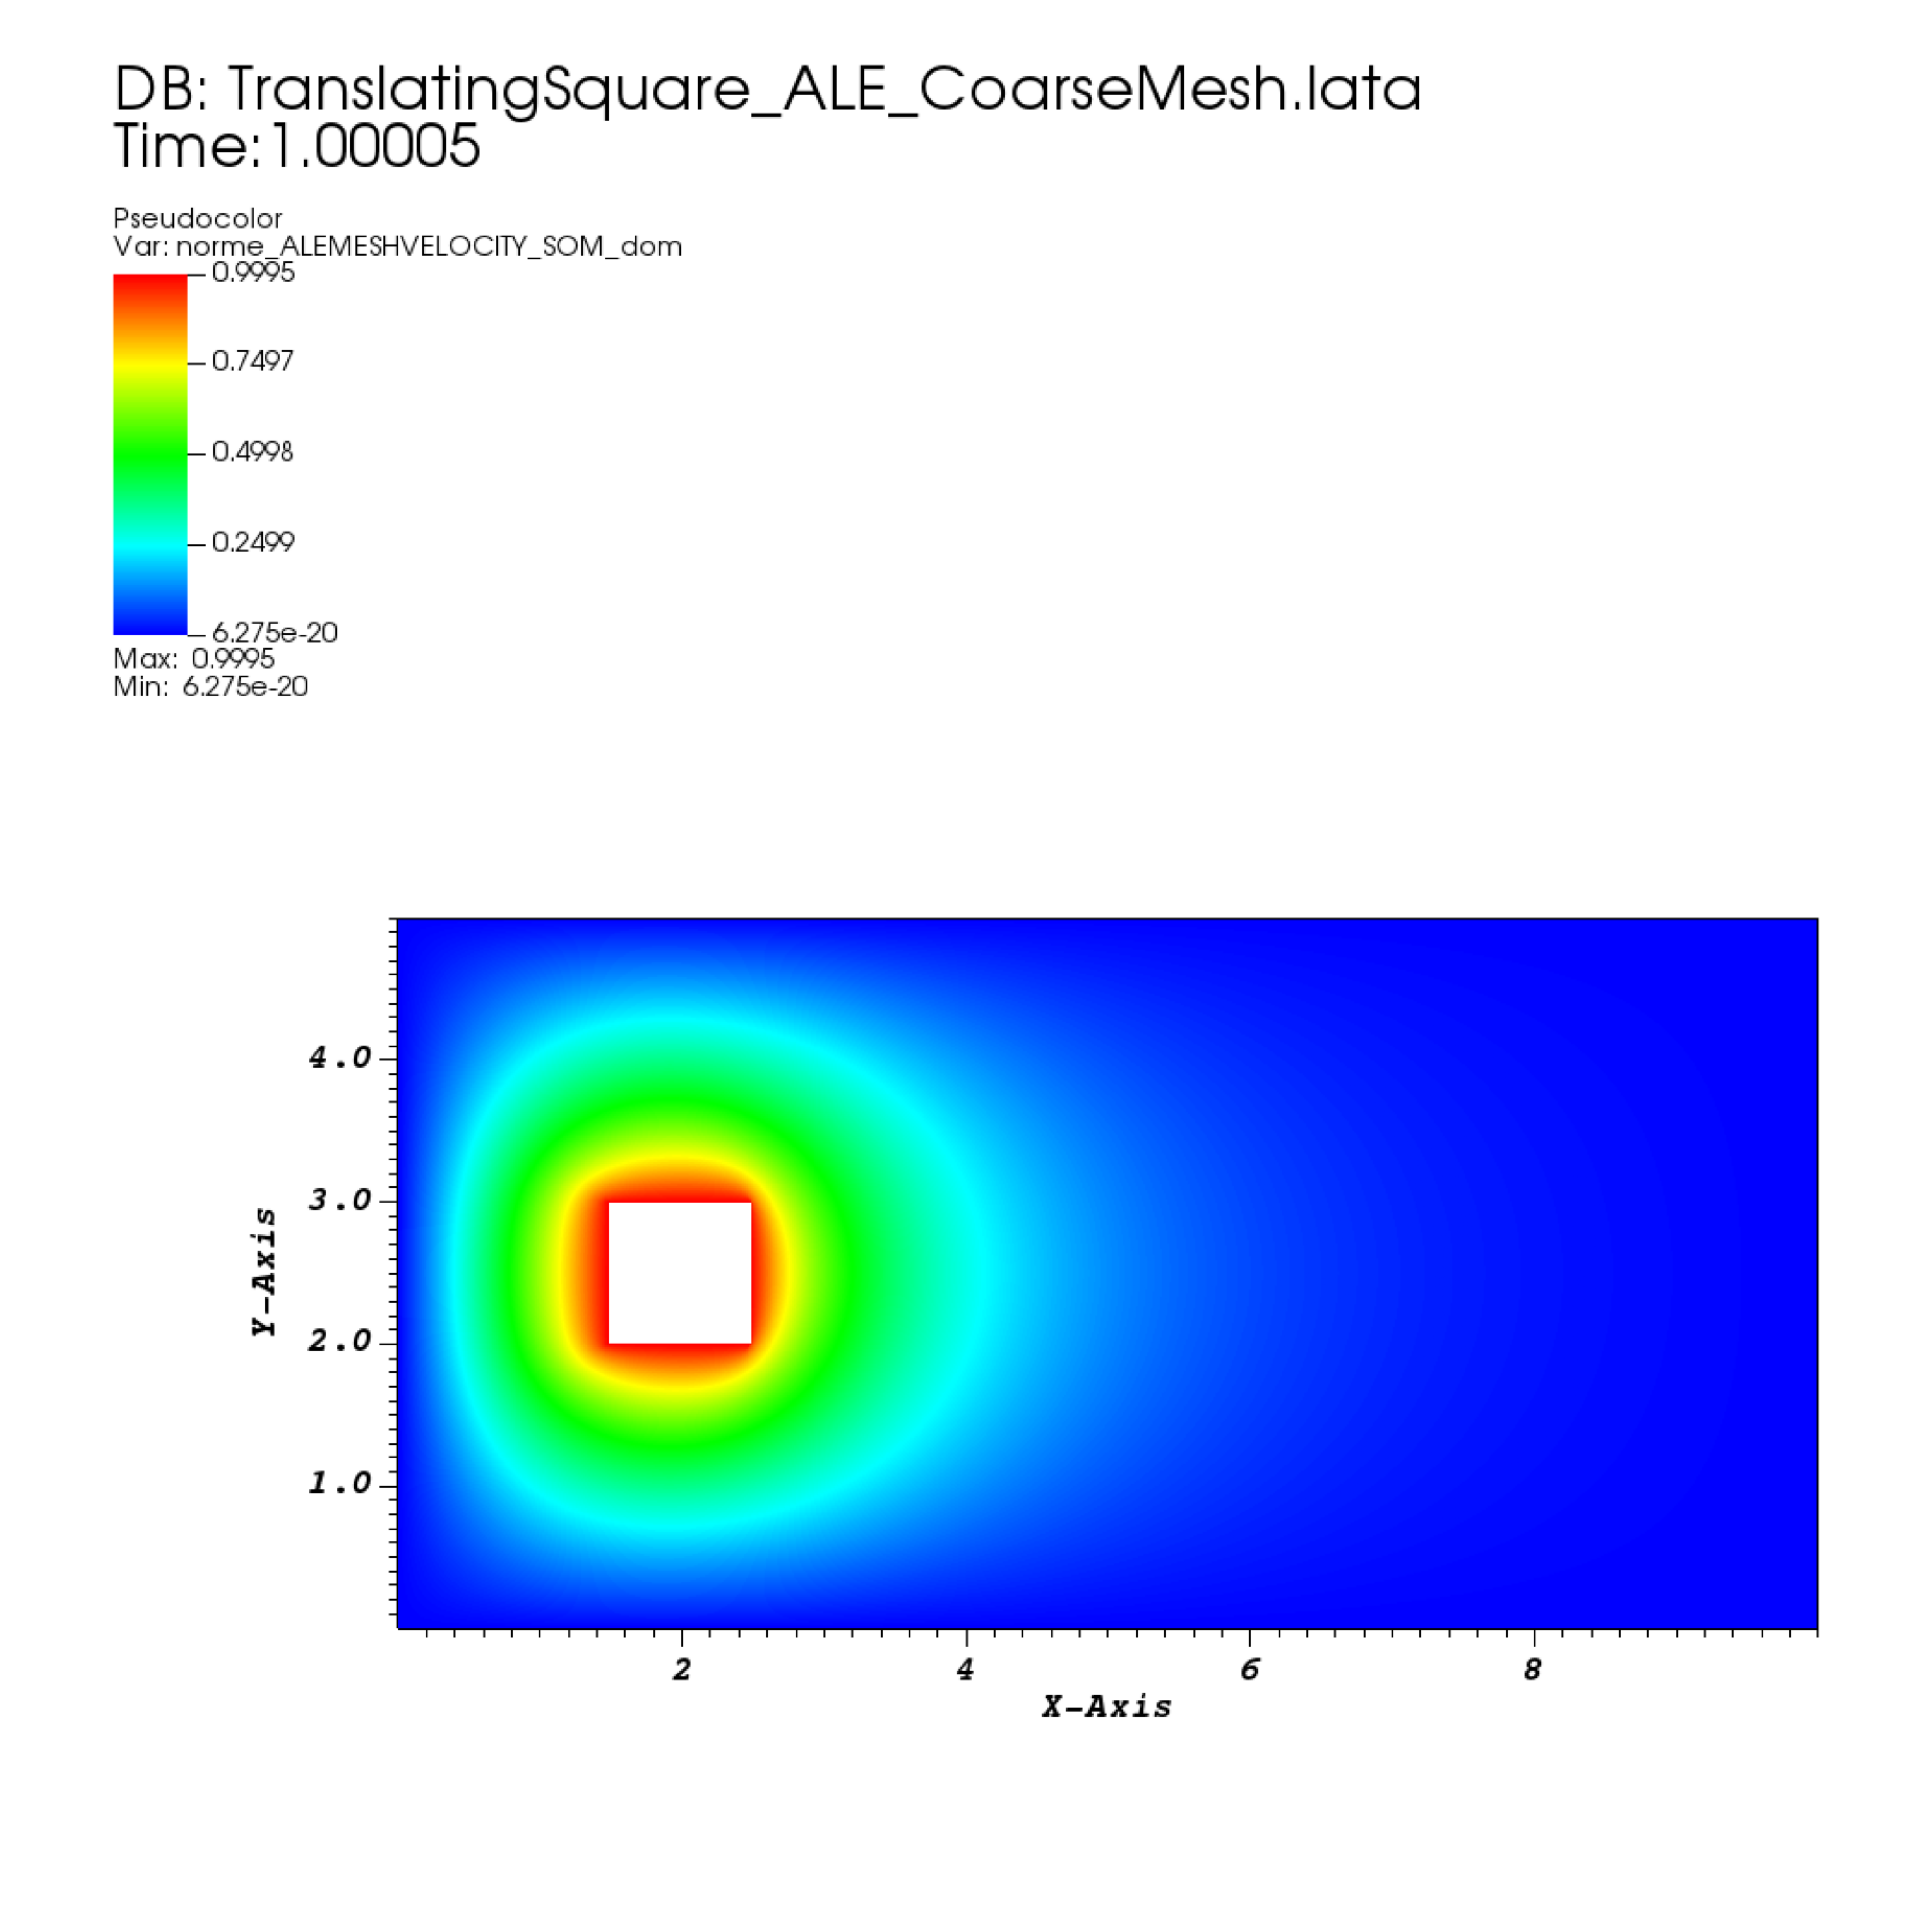

In [6]:
from trustutils import visit
 
visu = visit.Show("TranslatingSquare_ALE_CoarseMesh.lata","Pseudocolor","norme_ALEMESHVELOCITY_SOM_dom",plotmesh=False)
visu.plot()

## Conclusion 
 
The 2D SPHERIC benchmark [1] reference results were compared with the ALE-based TrioCFD simulations. Due to computational cost, it was not feasible to use the same fine mesh resolution ($\Delta x$ =0.0167) as in the benchmark for this validation sheet. Such high-resolution ALE simulations would require significantly more time, which is impractical for the current analysis and formation goals.
Therefore, the ALE results presented here are obtained with a coarser mesh of approximately three times the cell size ($\Delta x$=0.05). Despite this, the overall drag evolution remains consistent in trend with the benchmark data, though ALE simulations tend to slightly underestimate the drag coefficient.
 These results confirm that TrioCFD with ALE discretization captures the main physical behavior of the benchmark, validating its use for more complex FSI problems, provided mesh resolution and computational cost are appropriately balanced.
 


## References: 
 
* 1. A. Colagrossi, 'SPHERIC benchmark 6: 2D Incompressible flow around a moving square inside a rectangular box. - 2D SPH Validation.', SPHERIC, [Online]. Available: http://spheric-sph.org/tests/test-6. [Accessed Sept. 29, 2017]. 
* 2. D. Panunzio, M. A. Puscas, and R. Lagrange, 'FSI--vibrations of immersed cylinders. Simulations with the engineering open source code TrioCFD. Test cases and experimental comparisons',  Comptes Rendus. M\'{e}canique, 2022. 


## Data Files

### TranslatingSquare\_ALE\_CoarseMesh

In [ ]:
run.dumpDatasetMD("./TranslatingSquare_ALE_CoarseMesh.data")